# Softmax Regression (Multinomial Logistic Regression)

Regular (binary) logistic regression utilizes a sigmoid activation function, while Multinomial Logistic Regression uses softmax.

Softmax Regression is simply a generalized case of logistic regression. Softmax Regression can handle a binary case as well.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Define Some Useful Functions

In [3]:
def softmax(x):
    e = np.exp(x - np.max(x))  # prevent overflow
    if e.ndim == 1:
        return e / np.sum(e, axis=0)
    else:  
        return e / np.array([np.sum(e, axis=1)]).T # ndim = 2
    
def log_likelihood(features, target, weights):
    m = features.shape[0]  # number of training examples
    scores = np.dot(features, weights) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    
    loss = (-1 / m) * np.sum(target * np.log(prob)) #We then find the loss of the probabilities
    return loss

## Generate Some Data

In [4]:
np.random.seed(16)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
x3 = np.random.multivariate_normal([-4, 3], [[1, -.5],[-.5, 1]], num_observations)

multiclass_features = np.vstack((x1, x2, x3)).astype(np.float32)
multiclass_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations),
                              np.full(num_observations, 2))).astype(np.int)

# Get One-hot encoding of labels for softmax
multiclass_onehot = np.zeros((multiclass_labels.size, multiclass_labels.max()+1))
multiclass_onehot[np.arange(multiclass_labels.size), multiclass_labels] = 1

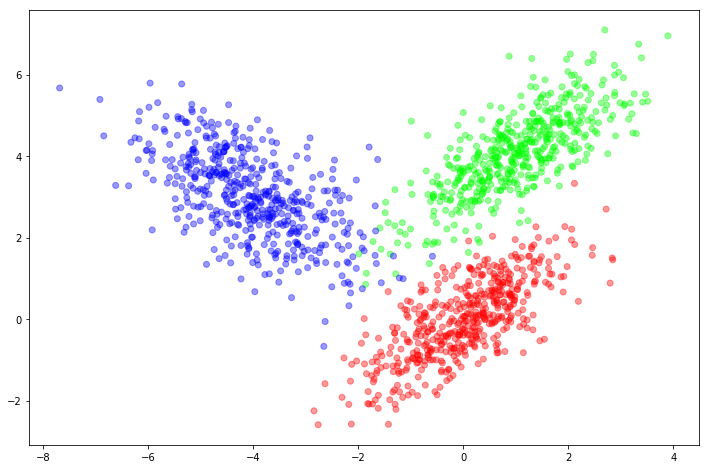

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(multiclass_features[:, 0], multiclass_features[:, 1],
            c = multiclass_onehot, alpha = .4)

## Softmax Regression

In [6]:
def softmax_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros([features.shape[1], len(np.unique(target))+1])
    m = features.shape[0]  # number of training examples
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = softmax(scores)

        # Update weights with gradient
        gradient = (-1 / m) * np.dot(features.T,(target - predictions)) #compute the gradient for log-likelihood        
        weights -= learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [7]:
weights = softmax_regression(multiclass_features, multiclass_onehot,
                         num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

1.0984837006689898
0.6164021962445142
0.5179033071650024
0.4677438096654059
0.4321083239572715
0.40332635180652837
0.3787826413742692
0.3573126020491281
0.3382778305898208
0.3212664800320433
0.30597996356893203
0.2921848522386949
0.27969024600368614
0.2683359498154433
0.2579855618590164
0.24852195772977914
0.23984404395193268
0.2318642539495657
0.2245065271761528
0.21770463461852496
0.2114007714395688
0.2055443655572147
0.20009106545816363
0.19500187877886685
0.19024243845455147
0.1857823770295956
0.18159479270635748
0.17765579318350058
0.17394410543710406
0.17044074139893511


In [8]:
data_with_intercept = np.hstack((np.ones((multiclass_features.shape[0], 1)),
                                 multiclass_features))
final_scores = np.dot(data_with_intercept, weights)
#final_scores = np.dot(multiclass_features, weights)
preds_onehot = softmax(final_scores)
preds = np.apply_along_axis(np.argmax, 1, preds_onehot)

print('Accuracy from scratch: {0}'.format((preds == multiclass_labels).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.9713333333333334


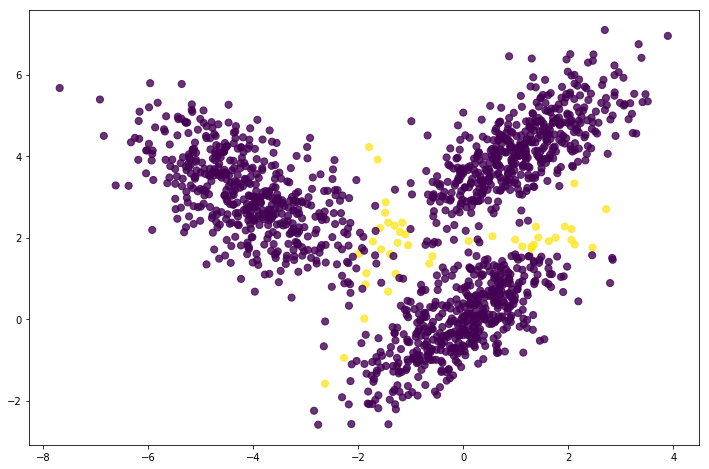

In [9]:
plt.figure(figsize = (12, 8))
plt.scatter(multiclass_features[:, 0], multiclass_features[:, 1],
            c = preds != multiclass_labels, alpha = .8, s = 50)